In [1]:
# Import relevant packages for initial analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import plotly
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools
py.init_notebook_mode(connected = True)

In [2]:
plotly.tools.set_credentials_file(username='Purvi_Thakor', api_key='IQOuptfQl29GCSaKVLnK')

The original data was in a zipped format. The unzipping of files was done only once, then the CSVs were read.

In [3]:
# zip_ref = zipfile.ZipFile("D:\Data Mining\Project_2\data\olympic-games.zip", 'r')
# zip_ref.extractall("D:\Data Mining\Project_2\data")
# zip_ref.close()

Read the CSV and remove unnecessary columns

In [4]:
dic = pd.read_csv("D:\Fall 2017\Intro to Data Mining\Project_2\data\dictionary.csv")
dic.head()

#drop population and gdp 
dic.drop(['Population', 'GDP per Capita'], axis=1, inplace=True)
dic.head()

,Country,Code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,ALG
3,American Samoa*,ASA
4,Andorra,AND


In [5]:
# Load the files

summer = pd.read_csv("D:\Fall 2017\Intro to Data Mining\Project_2\data\summer.csv")
# Add season name
summer['Season'] = 'Summer'
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Season
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Summer
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Summer


In [6]:
# Load the files

winter = pd.read_csv("D:\Fall 2017\Intro to Data Mining\Project_2\data\winter.csv")
# Add season name
winter['Season'] = 'Winter'
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Season
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze,Winter
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze,Winter
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze,Winter
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze,Winter
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold,Winter


Append winter data below summer data to create a single dataframe.

In [7]:
appended = summer.append(winter, ignore_index= True )  #used ignore_index to have a new series for index column
appended.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Season
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Summer
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Summer


Merge the full country names. During merge, the country codes that do not have a full name are removed. #N/As are also removed from country.


In [8]:
indi_level = pd.merge(left = appended, right = dic, left_on = 'Country', right_on = 'Code')
indi_level.head()

,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Season,Country_y,Code
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer,Hungary,HUN
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Summer,Hungary,HUN
2,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Summer,Hungary,HUN
3,1896,Athens,Athletics,Athletics,"DANI, Nandor",HUN,Men,800M,Silver,Summer,Hungary,HUN
4,1896,Athens,Athletics,Athletics,"KELLNER, Gyula",HUN,Men,Marathon,Bronze,Summer,Hungary,HUN


In [9]:
# Rename column names

indi_level = indi_level.drop('Country_x', axis = 1 )
indi_level = indi_level.rename(columns = {'Country_y' : 'Country'} )
print(indi_level.shape)
indi_level.head()


(30568, 11)


,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,Season,Country,Code
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",Men,100M Freestyle,Gold,Summer,Hungary,HUN
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",Men,1200M Freestyle,Gold,Summer,Hungary,HUN
2,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",Men,100M,Bronze,Summer,Hungary,HUN
3,1896,Athens,Athletics,Athletics,"DANI, Nandor",Men,800M,Silver,Summer,Hungary,HUN
4,1896,Athens,Athletics,Athletics,"KELLNER, Gyula",Men,Marathon,Bronze,Summer,Hungary,HUN


In [10]:
# Load the file for Latitude and longitude of country names

lat_lon = pd.read_csv("D:\Fall 2017\Intro to Data Mining\Project_2\data\Latitude_Longitude.csv")
lat_lon.head()

,Country,latitude,longitude
0,Hungary,47.162494,19.503304
1,Austria,47.516231,14.550072
2,Greece,39.074208,21.824312
3,United States,37.090240,-95.712891
4,Germany,51.165691,10.451526


In [11]:
# Merge the latitude & longitude columns

indi_level = pd.merge(left = indi_level, right = lat_lon, left_on = 'Country', right_on = 'Country')
indi_level.head()

,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,Season,Country,Code,latitude,longitude
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",Men,100M Freestyle,Gold,Summer,Hungary,HUN,47.162494,19.503304
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",Men,1200M Freestyle,Gold,Summer,Hungary,HUN,47.162494,19.503304
2,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",Men,100M,Bronze,Summer,Hungary,HUN,47.162494,19.503304
3,1896,Athens,Athletics,Athletics,"DANI, Nandor",Men,800M,Silver,Summer,Hungary,HUN,47.162494,19.503304
4,1896,Athens,Athletics,Athletics,"KELLNER, Gyula",Men,Marathon,Bronze,Summer,Hungary,HUN,47.162494,19.503304


In [12]:
# Create columns with medal colors to give a count to each medal in each row

indi_level['Gold'] = np.where(indi_level['Medal']=='Gold', 1, 0)
indi_level['Silver'] = np.where(indi_level['Medal']=='Silver', 1, 0)
indi_level['Bronze'] = np.where(indi_level['Medal']=='Bronze', 1, 0)

#count the number of total medals won 
indi_level['Total_Medals'] = indi_level[['Bronze', 'Silver', 'Gold']].sum(axis = 1) #useful in pivots

indi_level.head()

,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,Season,Country,Code,latitude,longitude,Gold,Silver,Bronze,Total_Medals
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",Men,100M Freestyle,Gold,Summer,Hungary,HUN,47.162494,19.503304,1,0,0,1
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",Men,1200M Freestyle,Gold,Summer,Hungary,HUN,47.162494,19.503304,1,0,0,1
2,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",Men,100M,Bronze,Summer,Hungary,HUN,47.162494,19.503304,0,0,1,1
3,1896,Athens,Athletics,Athletics,"DANI, Nandor",Men,800M,Silver,Summer,Hungary,HUN,47.162494,19.503304,0,1,0,1
4,1896,Athens,Athletics,Athletics,"KELLNER, Gyula",Men,Marathon,Bronze,Summer,Hungary,HUN,47.162494,19.503304,0,0,1,1


In [13]:
# Assign points to each medal Gold:3, Silver:2, Bronze:1

indi_level['Points']= ""
conditions = [(indi_level['Medal']== 'Gold'),  (indi_level['Medal']== 'Silver'), (indi_level['Medal']== 'Bronze')]
choices = [3,2,1]
indi_level['Points'] = np.select(conditions, choices)
indi_level.head()

,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,Season,Country,Code,latitude,longitude,Gold,Silver,Bronze,Total_Medals,Points
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",Men,100M Freestyle,Gold,Summer,Hungary,HUN,47.162494,19.503304,1,0,0,1,3
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",Men,1200M Freestyle,Gold,Summer,Hungary,HUN,47.162494,19.503304,1,0,0,1,3
2,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",Men,100M,Bronze,Summer,Hungary,HUN,47.162494,19.503304,0,0,1,1,1
3,1896,Athens,Athletics,Athletics,"DANI, Nandor",Men,800M,Silver,Summer,Hungary,HUN,47.162494,19.503304,0,1,0,1,2
4,1896,Athens,Athletics,Athletics,"KELLNER, Gyula",Men,Marathon,Bronze,Summer,Hungary,HUN,47.162494,19.503304,0,0,1,1,1


In [14]:
# remove Code Column
indi_level =indi_level.drop(['Code'], axis=1)

# Rename the column name
# indi_level = indi_level.rename(columns = {'City': 'Host_City'})
indi_level.head()

,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,Season,Country,latitude,longitude,Gold,Silver,Bronze,Total_Medals,Points
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",Men,100M Freestyle,Gold,Summer,Hungary,47.162494,19.503304,1,0,0,1,3
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",Men,1200M Freestyle,Gold,Summer,Hungary,47.162494,19.503304,1,0,0,1,3
2,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",Men,100M,Bronze,Summer,Hungary,47.162494,19.503304,0,0,1,1,1
3,1896,Athens,Athletics,Athletics,"DANI, Nandor",Men,800M,Silver,Summer,Hungary,47.162494,19.503304,0,1,0,1,2
4,1896,Athens,Athletics,Athletics,"KELLNER, Gyula",Men,Marathon,Bronze,Summer,Hungary,47.162494,19.503304,0,0,1,1,1


The data so far is at an athlete level. So, if a team has won a sport all the members will be awarded a medal. This increases the count of medals won by that country. 

Thus, I have removed duplicates and rolled up the data at a country and event level.

In [15]:
# Data is at an athlete level. So, remove dupicates from the dataframe to bring it up to country level

ctry_level =indi_level.drop(['Athlete', 'Gender'], axis=1)
ctry_level = ctry_level.drop_duplicates()

print(ctry_level.shape)

ctry_level.head()

(14146, 15)


,Year,City,Sport,Discipline,Event,Medal,Season,Country,latitude,longitude,Gold,Silver,Bronze,Total_Medals,Points
0,1896,Athens,Aquatics,Swimming,100M Freestyle,Gold,Summer,Hungary,47.162494,19.503304,1,0,0,1,3
1,1896,Athens,Aquatics,Swimming,1200M Freestyle,Gold,Summer,Hungary,47.162494,19.503304,1,0,0,1,3
2,1896,Athens,Athletics,Athletics,100M,Bronze,Summer,Hungary,47.162494,19.503304,0,0,1,1,1
3,1896,Athens,Athletics,Athletics,800M,Silver,Summer,Hungary,47.162494,19.503304,0,1,0,1,2
4,1896,Athens,Athletics,Athletics,Marathon,Bronze,Summer,Hungary,47.162494,19.503304,0,0,1,1,1


# Medal distribution using Plotly

From 1896-2014 a total of 14,146 medals have been awarded to about 130 countries. If a tie occurs, multiple medals will be given for whichever place was tied. For example, if two people tie for the gold medal, two gold medals will be awarded plus a bronze. No silver medal is awarded.

As you can see below, the gold, silver, and bronze medals are split roughly, but not equally in three ways.


In [16]:
initial = ctry_level.groupby(['Country'])['Gold', 'Silver', 'Bronze', 'Total_Medals'].sum()
initial = initial.sort_values(by = 'Total_Medals', ascending=False)
initial = initial.reset_index()


##number of countries
len(initial.Country)

sum(initial.Total_Medals)
sum(initial.Gold)
sum(initial.Silver)
sum(initial.Bronze)

g = np.round(sum(initial.Gold)/sum(initial.Total_Medals) *100, 1)
g

s = np.round(sum(initial.Silver)/sum(initial.Total_Medals) *100,1)
s


b = np.round(sum(initial.Bronze)/sum(initial.Total_Medals) *100, 1)
b

pie_values = [g,s,b]
labels = ['Gold', 'Silver', 'Bronze']
colors = ['#FFD700', '#C0C0C0', '#8C7853']

pie_chart = [go.Pie( labels = labels , values=pie_values, hoverinfo='label+percent', textinfo='value' + "%",
              textfont=dict(size=20),   marker=dict(colors=colors, line=dict(color='#000000', width=2))) ]

layout = dict(title = "Split of Medals awarded to " + str(len(initial.Country)) + " countries from 1896 - 2014\n" )                    
fig = dict(data=pie_chart, layout = layout )
py.iplot(fig)


# Trends of Gold medals won by the top Athletes over the years in Summer Olympics

1. Without doubt, Michael Phelps is on the top winning 18 gold medals. He is an American swimmer who holds the record for winning the most gold medals.
2. The next three players - Carl Lewis, Paavo Nurmi, Mark Spitz, have all won 9 gold medals each.


	 The top Athletes in Summer who have won the most Gold medals are :

           Athlete
0  PHELPS, Michael
1      LEWIS, Carl
2     NURMI, Paavo
3      SPITZ, Mark
4  BIONDI, Matthew
5  THOMPSON, Jenny
6      KATO, Sawao
7        EWRY, Ray


Trends of Gold medals won by the top Athletes over the years in Summer Olympics

Year             1900  1904  1908  1920  1924  1928  1968  1972  1976  1984  \
Athlete                                                                       
BIONDI, Matthew     0     0     0     0     0     0     0     0     0     1   
EWRY, Ray           3     3     2     0     0     0     0     0     0     0   
KATO, Sawao         0     0     0     0     0     0     3     3     2     0   
LEWIS, Carl         0     0     0     0     0     0     0     0     0     4   
NURMI, Paavo        0     0     0     3     5     1     0     0     0     0   
PHELPS, Michael     0     0     0     0     0     0     0     0     0     0   
SPITZ, Mark         0     0     0     0     

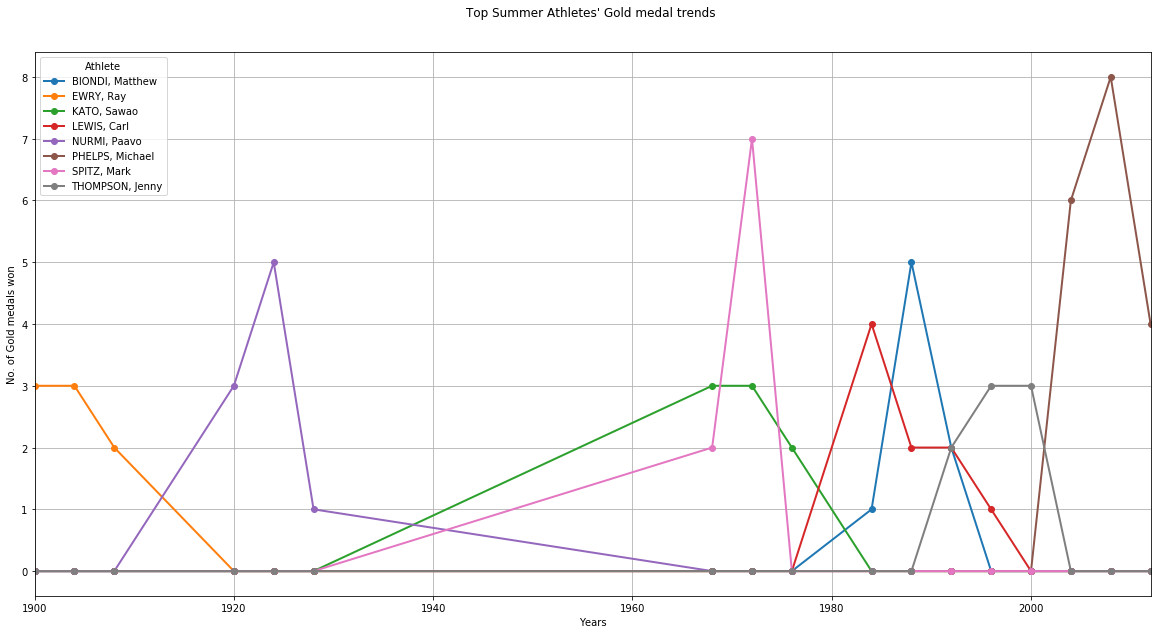

In [17]:
### Athletes at Summer Games - Gold medal analysis

#subset data for Summer
summer_ath = indi_level[indi_level['Season'] == 'Summer']

# Summarize the number of gold medals won by each athlete
summ_top   = summer_ath.groupby(['Athlete'])['Gold'].sum()
summ_top = summ_top.to_frame()
summ_top = summ_top.reset_index()
# Sorting it by descending order of Gold medals won
summ_top = summ_top.sort_values(by = 'Gold', ascending = False)
summ_top = summ_top.head(8)      # Taken top 8 to break the tie between athletes who won same number of medals
# Filter out the top Athlete names
summ_top_ath = summ_top.filter(['Athlete'])

# Reorder the index to begin with 0
summ_top_ath.index = range(len(summ_top_ath))
summ_top_ath
print("\t The top Athletes in Summer who have won the most Gold medals are :\n")
print(summ_top_ath)
print("\n")


# filter out the data for the top athletes from the Summer dataframe that was subsetted initially
top_ath_summer = pd.merge(summer_ath, summ_top_ath, on='Athlete')  #data for top athletes in summer
top_ath_summer.head()

# Create a pivot table to summarize the Gold medal trends of top athletes during Summer
summer_top_ath_years = pd.pivot_table(top_ath_summer, index = ['Athlete'] , values = ['Gold'], columns = ['Year'] , aggfunc = { 'Gold' : 'sum'})
# #replace NAN with 0
summer_top_ath_years[np.isnan(summer_top_ath_years)] = 0
summer_top_ath_years = summer_top_ath_years.xs('Gold' ,  axis = 1 , drop_level= True)

#convert float to integer
summer_top_ath_years = summer_top_ath_years.astype(int)
summer_top_ath_years

print("Trends of Gold medals won by the top Athletes over the years in Summer Olympics\n")
print(summer_top_ath_years)



summer_top_ath_years.T.plot(kind='line', figsize = (20,10), 
                              marker='o', 
                              title='Top Summer Athletes\' Gold medal trends \n\n' , linewidth = 2.0 )
plt.xlabel("Years")
plt.ylabel("No. of Gold medals won")
plt.grid()
plt.show()

# Trends of Gold medals won by the top Athletes over the years in Winter Olympics

1. The top two athletes have each won 8 gold medals from 1896 to 2014.
2. Eric Heiden is a former American speed skater and cyclist who has won an unprecendented 5 gold medals at the 1980 Winter Olympics in New York. 

	 The top Athletes in Winter who have won the most Gold medals are :

                  Athlete
0          DAEHLIE, Björn
1  BJOERNDALEN, Ole Einar
2         BJOERGEN, Marit
3      PECHSTEIN, Claudia
4          THUNBERG, Clas
5        ALSGAARD, Thomas
6           BLAIR, Bonnie
7            HEIDEN, Eric


Trends of Gold medals won by the top Athletes over the years in Winter Olympics

Year                    1924  1928  1980  1988  1992  1994  1998  2002  2006  \
Athlete                                                                        
ALSGAARD, Thomas           0     0     0     0     0     1     2     2     0   
BJOERGEN, Marit            0     0     0     0     0     0     0     0     0   
BJOERNDALEN, Ole Einar     0     0     0     0     0     0     1     4     0   
BLAIR, Bonnie              0     0     0     1     2     2     0     0     0   
DAEHLIE, Björn             0     0     0     0     3     2     3     0     0   
HEIDEN, Eric               0     0     5     0     0 

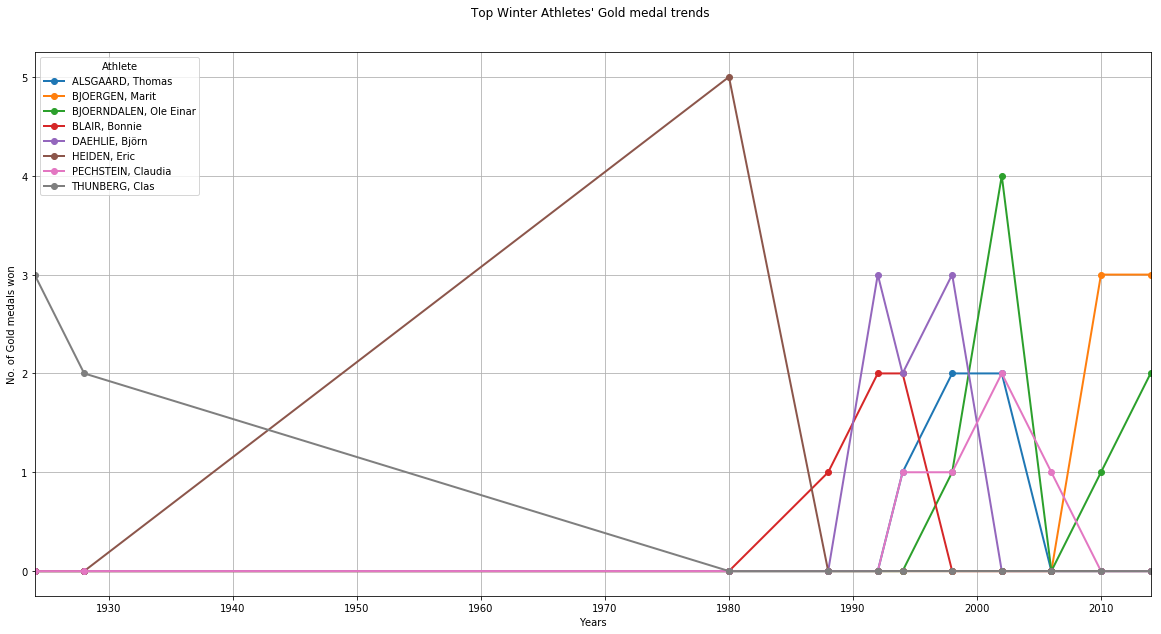

In [18]:
### Athletes at Winter Games - Gold medal analysis

#subset data for Winter
winter_ath = indi_level[indi_level['Season'] == 'Winter']

# Summarize the number of gold medals won by each athlete
win_top   = winter_ath.groupby(['Athlete'])['Gold'].sum()
win_top = win_top.to_frame()
win_top = win_top.reset_index()
# Sorting it by descending order of Gold medals won
win_top = win_top.sort_values(by = 'Gold', ascending = False)
win_top = win_top.head(8)      # Taken top 8 to break the tie between athletes who won same number of medals
# Filter out the top Athlete names
win_top_ath = win_top.filter(['Athlete'])

# Reorder the index to begin with 0
win_top_ath.index = range(len(win_top_ath))
win_top_ath
print("\t The top Athletes in Winter who have won the most Gold medals are :\n")
print(win_top_ath)
print("\n")

# filter out the data for the top athletes from the Winter dataframe that was subsetted initially
top_ath_winter = pd.merge(winter_ath, win_top_ath, on='Athlete')  #data for top athletes in winter
top_ath_winter.head()

# Create a pivot table to summarize the Gold medal trends of top athletes during Winter
winter_top_ath_years = pd.pivot_table(top_ath_winter, index = ['Athlete'] , values = ['Gold'], columns = ['Year'] , aggfunc = { 'Gold' : 'sum'})
# #replace NAN with 0
winter_top_ath_years[np.isnan(winter_top_ath_years)] = 0
winter_top_ath_years = winter_top_ath_years.xs('Gold' ,  axis = 1 , drop_level= True)

#convert float to integer
winter_top_ath_years = winter_top_ath_years.astype(int)
winter_top_ath_years

print("Trends of Gold medals won by the top Athletes over the years in Winter Olympics\n")
print(winter_top_ath_years)



winter_top_ath_years.T.plot(kind='line', figsize = (20,10), 
                              marker='o', 
                              title='Top Winter Athletes\' Gold medal trends \n\n' , linewidth = 2, legend = True )
plt.xlabel("Years")
plt.ylabel("No. of Gold medals won")
plt.grid()
plt.show()

# Comparisons of points scored by top countries

I have assigned points to each medal color to break the tie when two or more countries win the same number of medals.
Points assignment:

*Gold* : 3 points

*Silver* : 2 points

*Bronze* : 1 point

Based on these points, I've shown a comparison of top countries in different seasons.

As the bar chart shows, Sweden, Germany and Russia have managed to stay in the top 10 of Summer as well as Winter games.

**Note**: US is not considered here since US tops the charts in Summer and Winter games.

Top 10 countries who have scored the highest points in Summer & Winter (excluding US)

           Country  Total Points
1   United Kingdom          1534
2          Germany          1474
3           France          1456
4            Italy          1315
5           Sweden          1198
6            China          1004
7           Russia           998
8           Norway           979
9          Hungary           950
10         Finland           888
Top 10 countries who have scored the highest points in Summer (excluding US)

           Country  Total Points
1   United Kingdom          1484
2           France          1265
3            Italy          1095
4          Germany          1070
5          Hungary           942
6           Sweden           918
7            China           911
8        Australia           855
9            Japan           768
10          Russia           739
Top 10 countries who have scored the highest points in Winter (excluding US)

        Country  Total Points
0

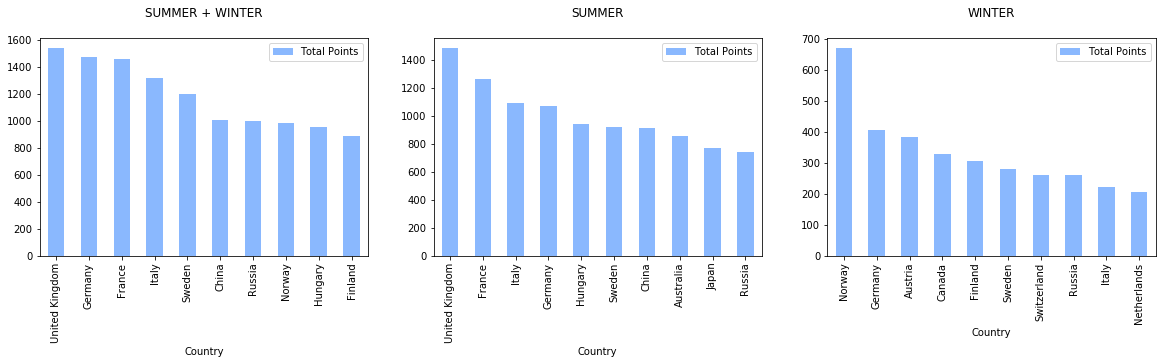

In [19]:
# Points have been considered here to break any ties in the number of medals won 

# both = Summer and Winter Games
both = pd.pivot_table(ctry_level, index = ['Country'], values=['Points'], aggfunc= {'Points': 'sum'})
both = both.astype(int)
both = both.sort_values(by = 'Points', ascending = False)
both = both.reset_index()
#remove US , since US is the highest in all analysis
both = both[both.Country!="United States"]
both = both.head(10)
print("Top 10 countries who have scored the highest points in Summer & Winter (excluding US)\n")
both = both.rename(columns = {'Points': 'Total Points'})
print(both)
both = both.set_index("Country")

# # # # S U M M E R 
summer = ctry_level[ctry_level.Season!="Winter"]
summer = pd.pivot_table(summer, index = ['Country'], values=['Points'], aggfunc= {'Points': 'sum'})
summer = summer.astype(int)
summer = summer.sort_values(by = 'Points', ascending = False)
summer = summer.reset_index()
# #remove US
summer = summer[summer.Country!="United States"]
summer = summer.head(10)
print("Top 10 countries who have scored the highest points in Summer (excluding US)\n")
summer = summer.rename(columns = {'Points': 'Total Points'})
print(summer)
summer = summer.set_index("Country")



# # # # W I N T E R

winter = ctry_level[ctry_level.Season!="Summer"]
winter = pd.pivot_table(winter, index = ['Country'], values=['Points'], aggfunc= {'Points': 'sum'})
winter = winter.astype(int)
winter = winter.sort_values(by = 'Points', ascending = False)
winter= winter.reset_index()
# #remove US
winter = winter[winter.Country!="United States"]
winter = winter.head(10)
print("Top 10 countries who have scored the highest points in Winter (excluding US)\n")
winter = winter.rename(columns = {'Points': 'Total Points'})
print(winter)
winter = winter.set_index("Country")
winter


# PLOTTING
fig, axes = plt.subplots(nrows=1, ncols=3)
both.plot.bar(ax=axes[0],   title="SUMMER + WINTER\n",  figsize=(20,4), color = "xkcd:carolina blue")
summer.plot.bar(ax=axes[1], title="SUMMER\n",           figsize=(20,4), color = "xkcd:carolina blue")
winter.plot.bar(ax=axes[2], title="WINTER\n",           figsize=(20,4), color = "xkcd:carolina blue")
plt.show()

# Women v/s Men Medalists in the Olympics

Even though the number of men participants is more in the Olympics, I wanted to see how women medalists are catching up to men medalists. This **Plotly** graph shows exactly that.

Women did not participate in the first Olympics in 1896. They started participating from the 1900 games. Six women even won medals in 1900. 3 women won in Golf and 3 won in Tennis. 

Ever since then the percentage of women winning at the Olympics has been increasing, though the data shows that number never crossed mens'- mainly because there are more male participants then female.

In [20]:
#test
#women /(men + women)
#Women participants at each Summer Olympic Games as a percentage of all participants

gender =indi_level.filter(['Year', 'Athlete', 'Gender'])
gender = gender.drop_duplicates()
gender_trend= pd.crosstab(gender.Year, gender.Gender)
gender_trend = gender_trend.reset_index()

#Percentage of women winning in the Olympics
gender_trend['Women %'] = np.round(gender_trend['Women']/(gender_trend['Men'] + gender_trend['Women']), 2) *100
gender_trend['Men %'] = np.round(gender_trend['Men']/(gender_trend['Men'] + gender_trend['Women']), 2) *100

print("\tWomen v/s Men Medalists in the Olympics\n") 
print(gender_trend)

women_trend = [go.Scatter(
          line = dict(color = ('rgb(255,20,147)')),
          name = 'Women',
          x=gender_trend.Year,
          y=gender_trend['Women %']),
              go.Scatter(
          line = dict(color = ('rgb(0,191,255)')),
          name = 'Men',        
          x=gender_trend.Year,
          y=gender_trend['Men %'])]

layout = dict(title = 'Women v/s Men Medalists in the Olympics',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Percentage'),
              )
fig = dict(data=women_trend, layout=layout)
py.iplot(fig)

	Women v/s Men Medalists in the Olympics

Gender  Year   Men  Women  Women %  Men %
0       1896    91      0      0.0  100.0
1       1900   385      6      2.0   98.0
2       1904   317      6      2.0   98.0
3       1908   699     14      2.0   98.0
4       1912   726     23      3.0   97.0
5       1920  1023     31      3.0   97.0
6       1924   796     45      5.0   95.0
7       1928   615     90     13.0   87.0
8       1932   588     56      9.0   91.0
9       1936   793     78      9.0   91.0
10      1948   719     85     11.0   89.0
11      1952   664     81     11.0   89.0
12      1956   553     85     13.0   87.0
13      1960   519     72     12.0   88.0
14      1964   551    111     17.0   83.0
15      1968   571    110     16.0   84.0
16      1972   545    108     17.0   83.0
17      1976   516    155     23.0   77.0
18      1980   455    122     21.0   79.0
19      1984   725    336     32.0   68.0
20      1988   606    275     31.0   69.0
21      1992  1024    463     31.0

# Top 3 countries' performance in a user selected sport across all the years

I have not considered United States in this analysis for the same reason that United States tops the charts mainly because US sends the most number of participants in the Olympics.

I have managed to create a **drop-down widget** in Jupyter Notebook that lets the reader select any discipline and based on that the chart is updated to show the trends of top 3 countries' performance throughout the years.


In [21]:
## Making use of a drop down widget to select the discipline of the sport

from ipywidgets import widgets
from IPython.display import display

disciplines = (ctry_level['Discipline'].unique().tolist())


w = widgets.Dropdown(description="Please select a Discipline", options=disciplines)
display(w)



	Top countries' performance in Swimming
Country  Australia  Japan  United Kingdom
Year                                     
1896             0      0               0
1900             2      0               3
1904             0      0               0
1908             0      0               7
1912             0      0               6
1920             2      0               2
1924             4      0               4
1928             2      3               4
1932             2     11               2
1936             0     10               0
1948             4      0               1
1952             1      3               1
1956            10      5               2
1960            11      5               3
1964             9      1               1
1968             8      0               1
1972             9      3               1
1976             1      0               3
1980             7      0               5
1984            12      0               5
1988             3      1           

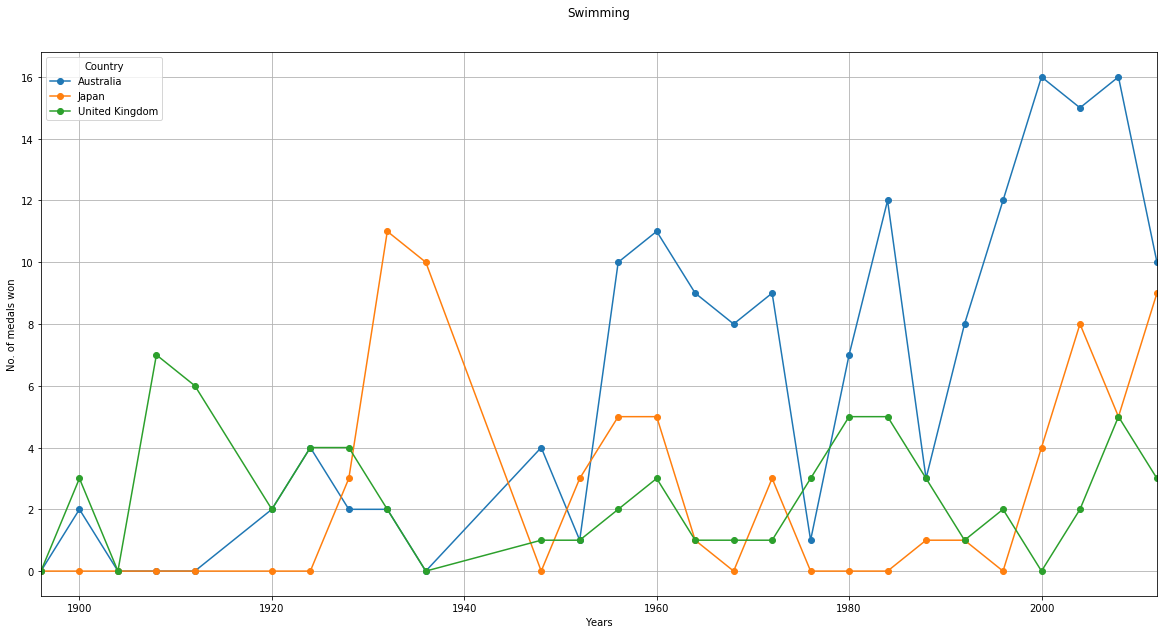

In [22]:
# store the value of the selection in a variable
selection = w.value

# Show the performance of the top 3 countries from the user-selected Discipline

# summarize the total medals won byb each country in the selected discipline
ctry_disc = pd.pivot_table(ctry_level[ctry_level.Discipline == selection], index=['Country'],columns = ['Year'] ,values = ['Total_Medals'], aggfunc = {'Total_Medals':'sum'})
ctry_disc[np.isnan(ctry_disc)] = 0 #replace NAN with 0
ctry_disc.head()



# Data arrangement
ctry_disc = ctry_disc.xs('Total_Medals' ,  axis = 1 , drop_level= True)
ctry_disc = ctry_disc.reset_index()
ctry_disc = ctry_disc.set_index("Country")
ctry_disc = ctry_disc.astype(int) #convert float to integer



ctry_disc['Total'] = ctry_disc.sum(axis = 1) #create a total columns table at the end to help sort in descending order
ctry_disc = ctry_disc.sort_values(by = 'Total', ascending = False )
ctry_disc = ctry_disc.reset_index()
ctry_disc = ctry_disc[ctry_disc.Country!="United States"] #remove US since it is the leader
ctry_disc = ctry_disc.head(3)
ctry_disc = ctry_disc.set_index('Country')
ctry_disc = ctry_disc.drop('Total', 1)

ctry_disc.head()
print("\tTop countries' performance in " + selection)
print(ctry_disc.T)



ctry_disc.T.plot(kind='line', figsize = (20,10),marker = 'o', title=selection + '\n\n')
plt.ylabel("No. of medals won")
plt.xlabel("Years")
plt.grid()
plt.show()



# Display the total number of medals won by countries in a particular year

Using the **Folium** library and latitudes and longitudes of countries, I've managed to display the number of total medals won by each country in a year.

-  The function **world_rankings_map** takes a year value and displays the total number of medals won by each participating country in that year.
-  The size of the circle on each country defines the number of medals won in that year.
-  A click on the circle will show a pop up displaying the number of medals won by the country in that year.

In [23]:
# Display the number of medals won by countries using Folium library

#!pip install folium
import folium
from IPython.display import display

In [24]:
# Display the top countries who won most medals using Folium library and user-selected year
from folium import plugins

data = ctry_level.filter(['Year','latitude', 'longitude', 'Country', 'Total_Medals'])
data = data.groupby(['Year', 'latitude', 'longitude', 'Country'])['Total_Medals'].sum()
data = data.to_frame()
data = data.reset_index()
data['Total_Medals'] = data['Total_Medals'].astype(float)
data.head()

# function to map the data for user-selected year
def world_rankings_map(year):    
    map_data = data.loc[data['Year'] == year]     
    world_map = folium.Map(location=[30,0], tiles="Mapbox Bright", zoom_start=2)    
    plugins.Fullscreen(position='topright',title='Expand me',title_cancel='Exit me',force_separate_button=True).add_to(world_map)
    for i in range(0,len(map_data)):
        folium.Circle(
            location=[map_data.iloc[i]['latitude'], map_data.iloc[i]['longitude']],
            radius= map_data.iloc[i]['Total_Medals']*7000,
            popup= str("In ") + str(year) +" " + str(map_data.iloc[i]['Country']) + str(" won ")  + str(int(map_data.iloc[i]['Total_Medals'])) + str(" medals") ,
            color='green',
            fill=True,
            fill_color='green'
        ).add_to(world_map)  
    map_data = map_data.sort_values(by = 'Total_Medals', ascending = False)   #sorting the data in descending order
    map_data['Total_Medals'] = map_data['Total_Medals'].astype(int)
    print("The top countries with highest number of medals in " + str(year) + " are : \n\n" )
    map_data.index = range(len(map_data))
    print(map_data.head(11))  
    display(world_map)  


In [25]:
# Display the top countries who won most medals using Folium library and user-selected year

world_rankings_map(2012)


The top countries with highest number of medals in 2012 are : 


    Year   latitude   longitude         Country  Total_Medals
0   2012  37.090240  -95.712891   United States            91
1   2012  35.861660  104.195397           China            81
2   2012  61.524010  105.318756          Russia            70
3   2012  55.378051   -3.435973  United Kingdom            62
4   2012  51.165691   10.451526         Germany            43
5   2012  36.204824  138.252924           Japan            36
6   2012  46.227638    2.213749          France            35
7   2012 -25.274398  133.775136       Australia            35
8   2012  35.907757  127.766922    Korea, South            29
9   2012  41.871940   12.567380           Italy            27
10  2012  52.132633    5.291266     Netherlands            20


**NOTE**

The rankings and medal counts are based on the data downloaded from __[Kaggle](https://www.theguardian.com/sport/datablog/2012/jun/25/olympic-medal-winner-list-data#data) __.

The actual ranks or counts may differ.
